In [18]:
# importación de librerias
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Parte 1: Exploración y Preprocesamiento

### 1. Carga el dataset y realiza exploración

In [19]:
data = pd.read_csv('diabetes.csv')
data.head(10)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1. ¿Cómo se distribuyen los valores de cada columna?


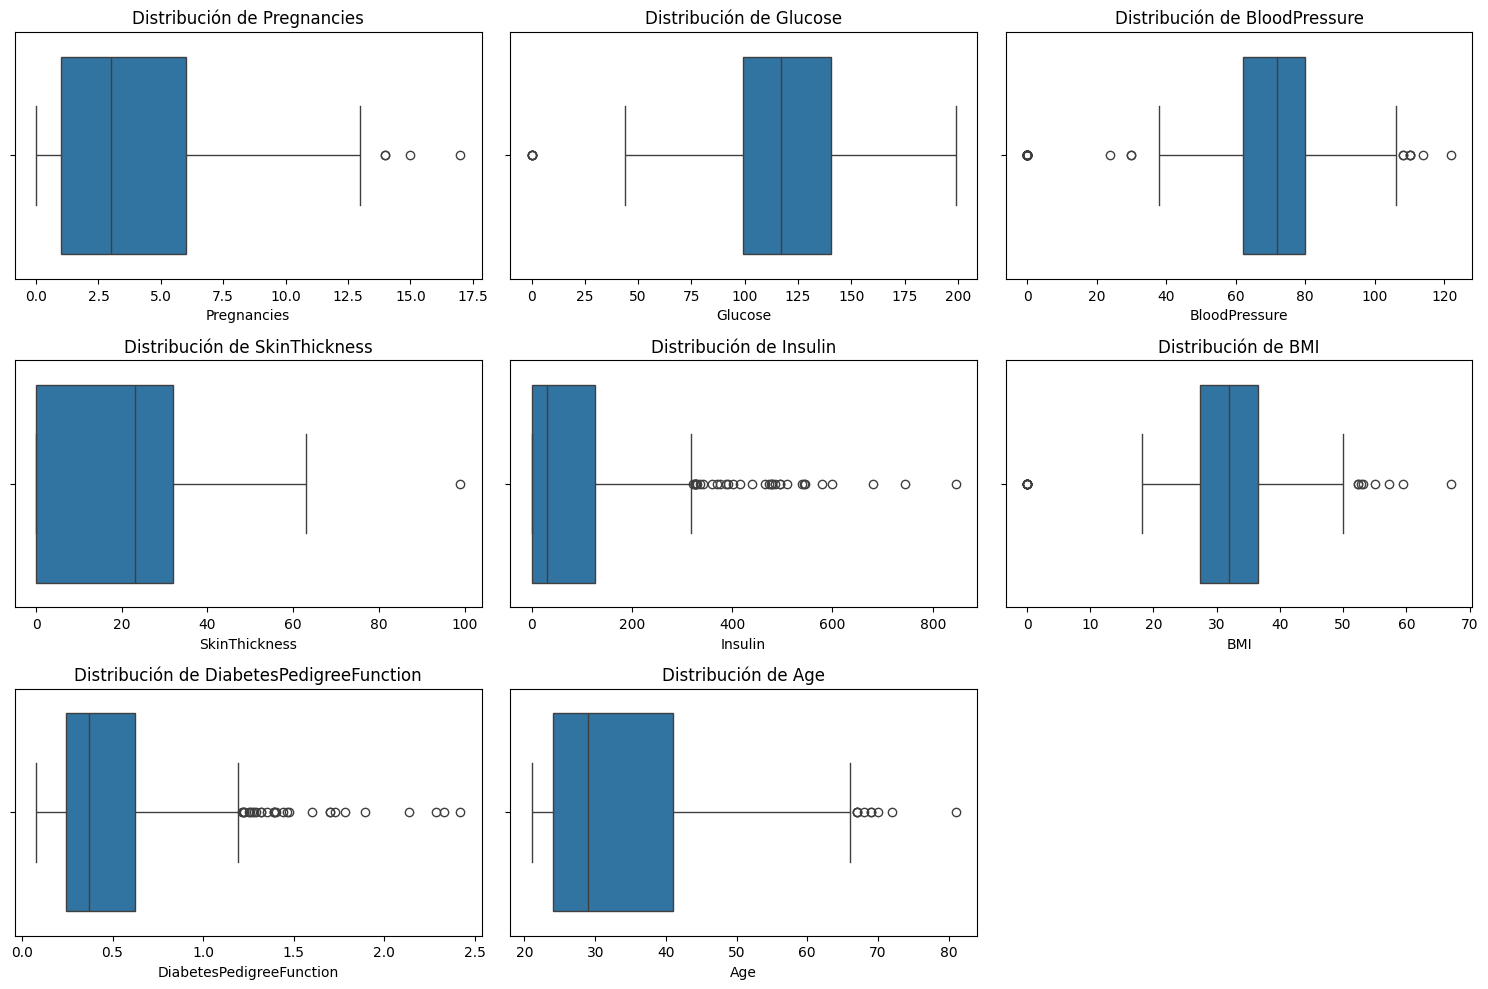

In [20]:
plt.figure(figsize=(15,10))
for i, column in enumerate(data.columns[:-1], 1):  # omitimos la variable objetivo
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

2. ¿Hay valores faltantes o datos anómalos?  
Podemos ver que en todas las columnas existen valores no validos o cero que por logica no representan valores validos, como ['Glucose','Insulin', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction'] . Para lo cual haremos una limpieza de destos datos y los reemplazaremos por los valores promedio de cada columna, sin contar los valores no validos.

### 2. Limpieza de datos

In [21]:
# estas columnas son las que se van a normalizar
columnas = ['Glucose','Insulin', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


In [22]:
# cambiar los valores 0 por un promedio de la columna
for columna in columnas:
    promedio = data[columna].replace(0, np.nan).mean()
    if columna != 'BMI':
        data[columna] = data[columna].replace(0, math.trunc(promedio))
    else:
        data[columna] = data[columna].replace(0, round(promedio, 2))
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.457500,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


Ahora que se han reemplazado los valores anomalos, se verificara que no existen variables categoricos

In [23]:
# verificar si hay variables categoricas en las columnas
for column in data.columns:
    for i in range(len(data[column])):
        if type(data[column][i])== str:
            print(f'la columna {column} tiene un valor no numérico: {data[column][i]}')
            break


Ya verificados que los datos no tengan valores categoricos, vamos a realizar un escalado estandar

In [24]:


# 1. Separar la columna 'Outcome'
X = data.drop(data.columns[8], axis=1)  
y = data.iloc[:, 8]

# 2. Escalar los datos de entrada (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Crear un nuevo DataFrame con los datos escalados
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

## Parte 2: División de datos


In [25]:
# 1. Dividir los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 2. Dividir los datos en entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



## Parte 3: Modelos de clasificación

#### 1. Regresión Logistica

In [26]:
# Crear  el modelo de regresión logística
reg_log = LogisticRegression(max_iter=100)
reg_log.fit(X_train, y_train)

# Validación
y_val_pred_reg_log = reg_log.predict(X_val)
acc_log = accuracy_score(y_val, y_val_pred_reg_log)

print("Accuracy Regresión Logística (validación):", acc_log)

# Calcular precisión, recall y f1-score
report = classification_report(y_test, y_val_pred_reg_log)
print("Reporte de Clasificación con datos de validación:")
print(report)



Accuracy Regresión Logística (validación): 0.7662337662337663
Reporte de Clasificación con datos de validación:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        99
           1       0.23      0.15      0.18        55

    accuracy                           0.52       154
   macro avg       0.42      0.44      0.42       154
weighted avg       0.47      0.52      0.49       154



#### 2. Árbol de decisión

Accuracy Árbol de Decisión (validación): 0.7402597402597403
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        99
           1       0.32      0.31      0.31        55

    accuracy                           0.52       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.52      0.52      0.52       154



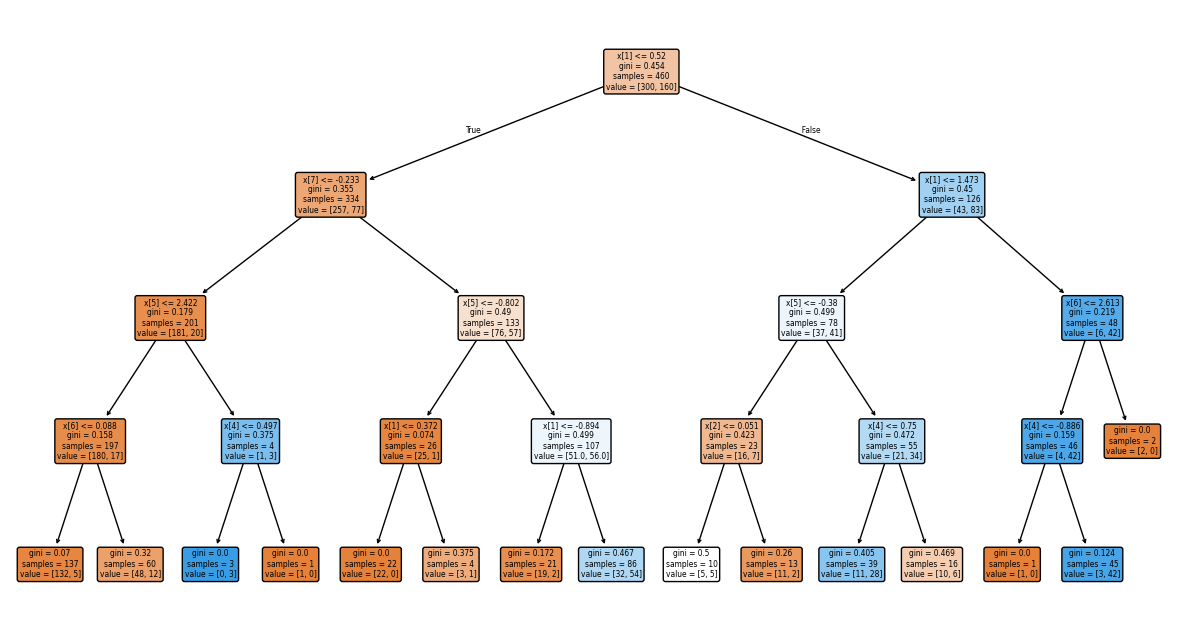

In [27]:
# Creación del árbol de decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Validación
y_val_pred_tree = tree.predict(X_val)
acc_tree = accuracy_score(y_val, y_val_pred_tree)
print("Accuracy Árbol de Decisión (validación):", acc_tree)

# Calcular precision, recall y F1-score
report1 = classification_report(y_test, y_val_pred_tree)
print("Reporte de Clasificación:")
print(report1)

# Visualizar el árbol
plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, rounded=True)
plt.show()

Matriz de Confusión:
[[63 36]
 [38 17]]


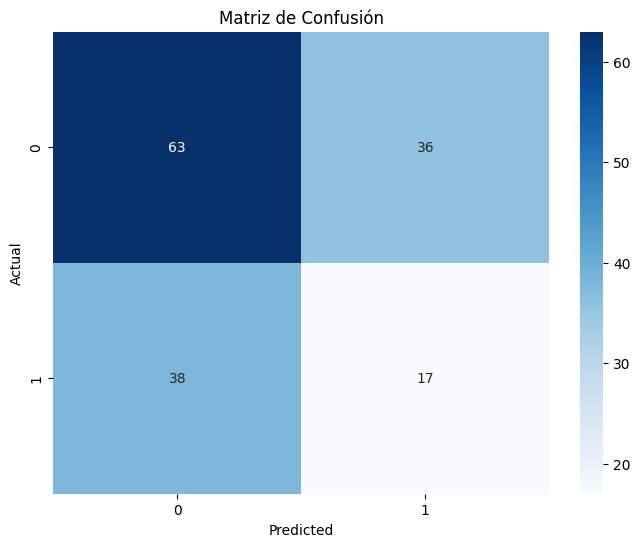

In [28]:
cm_tree = confusion_matrix(y_test, y_val_pred_tree)
print("Matriz de Confusión:")
print(cm_tree)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


#### 3. K-vecinos más cercanos (KNN) (elige un valor k razonable)
- cómo funciona el algoritmo KNN:
1. Mide la distancia (por ejemplo, euclidiana) entre este nuevo punto y cada uno de los puntos de datos que guardó durante el entrenamiento.
2. Identifica los 'k' puntos de datos de entrenamiento que están más cerca del nuevo punto. El valor de 'k' es un número que definimos previamente (por ejemplo, 3 o 5 vecinos).
3. De entre esos 'k' vecinos más cercanos, cuenta cuál es la clase o categoría más frecuente. La clase que obtenga la mayoría de los votos es la que se asigna como predicción para la nueva instancia."


- ¿Qué aprende el algoritmo KNN?  
El algoritmo KNN no entrena un modelo, se le conoce como aprendizaje vago, ya que, no se optimizan los pesos, sino que simplemente compara como de parecidos son los puntos que conocemos, con los puntos nuevos, para obtener asi una predicción.

In [29]:
best_k = None
best_acc = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_val, knn.predict(X_val))
    print(f"k={k}, accuracy={acc:.3f}")
    if acc > best_acc:
        best_k = k
        best_acc = acc

print(f"Mejor k encontrado: {best_k}, con accuracy: {best_acc:.3f}")

k=1, accuracy=0.688
k=2, accuracy=0.695
k=3, accuracy=0.701
k=4, accuracy=0.721
k=5, accuracy=0.734
k=6, accuracy=0.727
k=7, accuracy=0.714
k=8, accuracy=0.727
k=9, accuracy=0.721
k=10, accuracy=0.734
k=11, accuracy=0.727
k=12, accuracy=0.727
k=13, accuracy=0.747
k=14, accuracy=0.740
k=15, accuracy=0.753
k=16, accuracy=0.753
k=17, accuracy=0.753
k=18, accuracy=0.734
k=19, accuracy=0.747
k=20, accuracy=0.747
Mejor k encontrado: 15, con accuracy: 0.753


In [30]:
# Utilizamos el mejor K para el entrenamiento del modelo
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# predicción 
y_val_pred_knn = knn.predict(X_val)

# Calcular precision, recall y F1-score
report2 = classification_report(y_test, y_val_pred_knn)
print("Reporte de Clasificación: K-Nearest Neighbors y datos de validación:")
print(report2)



Reporte de Clasificación: K-Nearest Neighbors y datos de validación:
              precision    recall  f1-score   support

           0       0.65      0.82      0.72        99
           1       0.38      0.20      0.26        55

    accuracy                           0.60       154
   macro avg       0.51      0.51      0.49       154
weighted avg       0.55      0.60      0.56       154



## Parte 4: Evaluación

### Funciones de soporte

In [31]:
# función para mostrar la matriz de confusión por modelo
def matriz_confusion(model, y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Matriz de Confusión {model.__class__.__name__}')
    plt.show()

# función para mostrar el reporte de clasificación por modelo
def reporte_clasificacion(y_pred, y_test):

    report = classification_report(y_test, y_pred)
    print("Reporte de Clasificación:")
    print(report)

### Evaluación de los modelos, obtención de metricas y matriz de confusión

Evaluando modelo: KNeighborsClassifier


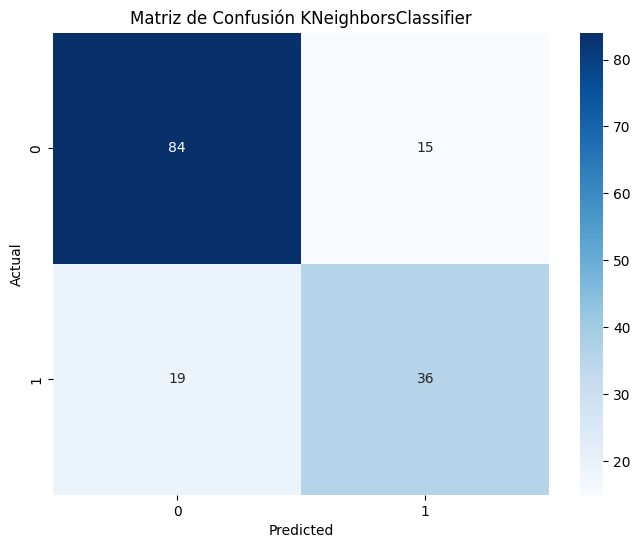

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



Evaluando modelo: LogisticRegression


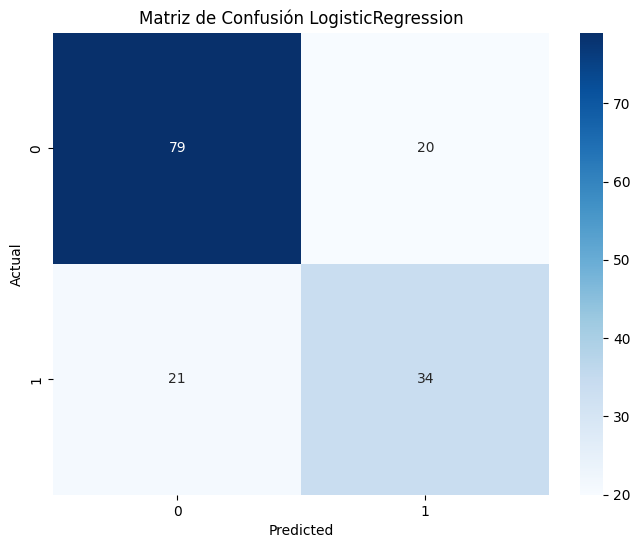

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



Evaluando modelo: DecisionTreeClassifier


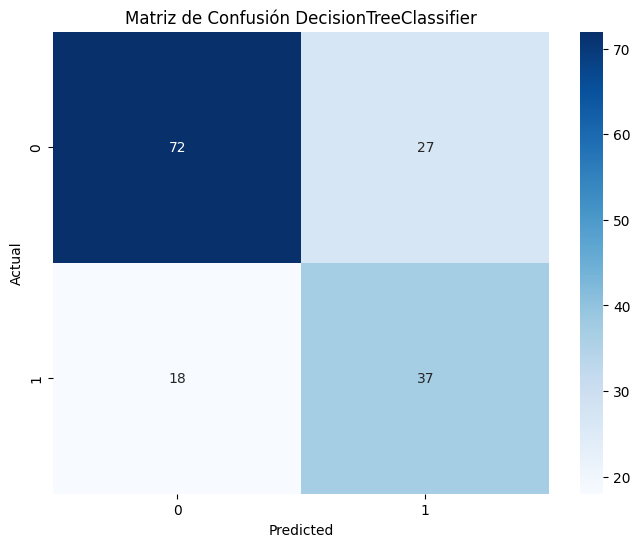

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154





In [32]:
trained_models = [knn, reg_log, tree]

# evaluar los modelos entrenados
for model in trained_models:
    print(f"Evaluando modelo: {model.__class__.__name__}")
    y_pred = model.predict(X_test)
    matriz_confusion(model, y_pred, y_test)
    reporte_clasificacion(y_pred, y_test)
    print("\n" + "="*50 + "\n")

### Compara y comenta las diferencias entre los modelos.



## Preguntas para reflexionar
1. ¿Qué desafíos enfrentaste en la limpieza y preprocesamiento de los datos? ¿Cómo los resolviste?


2. ¿Cómo afecta el escalado de características a los modelos? ¿Notaste diferencias de desempeño?


3. ¿Cuál modelo tuvo mejor desempeño y por qué crees que fue así?


4. ¿Qué muestra la matriz de confusión para cada modelo? ¿Hay algún tipo de error más frecuente?


5. ¿Cómo explicarías a un médico qué variables fueron clave para predecir diabetes con cada modelo?


6. ¿Qué ventajas y limitaciones ves en usar modelos interpretables frente a modelos menos interpretables?


7. ¿Qué harías para mejorar el desempeño o la interpretación de los modelos?
